In [3]:
import pandas as pd
import numpy as np
from scipy import stats

#Data for Campaign 22 (Kitchen Item Recommended)
baseline22 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_22_baseline.csv")
treatment22 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_22_treatment.csv")
sessions22 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_22_sessions.csv")

#Data for Campaign 35 (Furniture Item Recommended) 
baseline35 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_35_baseline.csv")
treatment35 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_35_treatment.csv")
sessions35 = pd.read_csv(r"C:\Users\level\Downloads\granifyproject-main\granifyproject-main\BA Candidate Assignment 1 Files [EXTERNAL]\campaign_35_sessions.csv")


First, I need to calculate the CTR for the two treatment groups. This is defined as the percentage of the treatment group that 
clicked the recommended item. To calculate this is as simple as summing the "clicked" column (as it is a binary variable) and then dividing the sum by the total number of rows.

In [4]:
#Clickthrough Rate for Campaign 22
CTR_22 = treatment22["clicked"].sum() / len(treatment22.index)

#Clickthrough Rate for Campaign 35
CTR_35 = treatment35["clicked"].sum() / len(treatment35.index)

#"{:%}".format() formats the variables as percentages
print("The CTR for Campaign 22 is", "{:%}".format(CTR_22))
print("The CTR for Campaign 35 is", "{:%}".format(CTR_35))

The CTR for Campaign 22 is 16.465302%
The CTR for Campaign 35 is 15.397665%


We can see that Campaign 22 had a higher CTR than Campaign 35. In fact, the CTR was a little more than one percentage point higher.

Now, I move on to calculate the Average Order Value, or AOV, for the treatment and baseline groups of both campaigns. The AOV is self-explanatory, and so to calculate it I simply calculate the mean of the "subtotal" column of each dataframe.

Then, I will calculate the AOV Lift for each campaign, defined as (AOV treatment / AOV baseline) - 1

In [5]:
#AOV for baseline and treatment groups from Campaign 22
AOV_baseline22 = baseline22["subtotal"].mean()
AOV_treatment22 = treatment22["subtotal"].mean()

#AOV for baseline and treatment groups from Campaign 35
AOV_baseline35 = baseline35["subtotal"].mean()
AOV_treatment35 = treatment35["subtotal"].mean()

print("Campaign 22 baseline group AOV: ", AOV_baseline22)
print("Campaign 22 treatment group AOV:", AOV_treatment22, "\n")
print("Campaign 35 baseline group AOV: ", AOV_baseline35)
print("Campaign 35 treatment group AOV:", AOV_treatment35, "\n")

AOV_lift22 = (AOV_treatment22 / AOV_baseline22) - 1
AOV_lift35 = (AOV_treatment35 / AOV_baseline35) - 1

print("Campaign 22 AOV Lift:", "{:%}".format(AOV_lift22))
print("Campaign 35 AOV Lift:", "{:%}".format(AOV_lift35))

Campaign 22 baseline group AOV:  114.86191877868646
Campaign 22 treatment group AOV: 115.49723714428356 

Campaign 35 baseline group AOV:  114.89859738444568
Campaign 35 treatment group AOV: 116.44605528390429 

Campaign 22 AOV Lift: 0.553115%
Campaign 35 AOV Lift: 1.346803%


But are these differences signficant? One way of assessing this is to run a T-test on the subtotals for the baseline and treatment groups for each campaign.

In [6]:
print("Campaign 22:", stats.ttest_ind(baseline22["subtotal"], treatment22["subtotal"]))
print("Campaign 35:", stats.ttest_ind(baseline35["subtotal"], treatment35["subtotal"]))

Campaign 22: Ttest_indResult(statistic=-5.449007942249054, pvalue=5.1248705327558394e-08)
Campaign 35: Ttest_indResult(statistic=-0.8487191331863406, pvalue=0.39604773671007165)


The p-value for Campaign 22 is extremely small, 5.12e-08, which means the difference in mean AOV between the baseline and treatment group for Campaign 22 is significant. The same cannot be said for differences between the baseline and treatment mean AOVs for Campaign 35, which only had a  p-value of 0.39.

Interestingly, even though the effects of the treatment in Campaign 22 are significant while the effects of the treatment in Campaign 35 are not, the AOV Lift is higher for Campaign 35 compared to Campaign 22. 

I will now merge the campaign data sets with the associated sessions CSV to do the next set of calcuations. To do so, I will concatenate the baseline, treatment, and sessions CSVs together for Campaign 22 and Campaign 33, respectively.

In [7]:
combined22 = pd.concat([baseline22, treatment22, sessions22]).sort_values(by="date")
combined35 = pd.concat([baseline35, treatment35, sessions35]).sort_values(by="date")

Now, I will calculate the CVR lift for both campaigns, defined as (CVR Treatment/CVR Baseline) - 1. To do this, I will first have to calculate the CVR, purchases/count, for the baseline and treatment groups. For this calculation, I am assuming that if the subtotal is > 0, then one purchase was made and, of course, if the subtotal is 0 then no purchase was made. I will create a new column that shows the number of purchases for each row.

In [8]:
for i, row in combined22.iterrows():
    
    if row["subtotal"] == 0:
        combined22.at[i, "purchases"] = 0
    
    else:
        combined22.at[i, "purchases"] = 1   
        
for i, row in combined35.iterrows():
    
    if row["subtotal"] == 0:
        combined35.at[i, "purchases"] = 0
    
    else:
        combined35.at[i, "purchases"] = 1   


In [9]:
CVR_baseline22 = combined22[combined22["group"] == "baseline"]["purchases"].sum() / len(combined22[combined22["group"] == "baseline"])
CVR_treatment22 = combined22[combined22["group"] == "treatment"]["purchases"].sum() / len(combined22[combined22["group"] == "treatment"])

CVR_baseline35 = combined35[combined35["group"] == "baseline"]["purchases"].sum() / len(combined35[combined35["group"] == "baseline"])
CVR_treatment35 = combined35[combined35["group"] == "treatment"]["purchases"].sum() / len(combined35[combined35["group"] == "treatment"])

CVR_lift22 = (CVR_treatment22 / CVR_baseline22) - 1
CVR_lift35 = (CVR_treatment35 / CVR_baseline35) - 1

print("The CVR Lift for Campaign 22 is",  "{:%}".format(CVR_lift22))
print("The CVR Lift for Campaign 35 is",  "{:%}".format(CVR_lift35))

The CVR Lift for Campaign 22 is 0.607488%
The CVR Lift for Campaign 35 is 2.204679%


The CVR Lift for Campaign 35 is higher than for Campaign 22.

Now, I will calculate the RPS Lift, defined as (RPS Treatment/RPS Baseline) - 1. To do this, I will first have to calculate the RPS, Revenue/count, for the baseline and treatment groups. The revenue is the value of the "subtotal" column.

In [10]:
RPS_baseline22 = combined22[combined22["group"] == "baseline"]["subtotal"].sum() / len(combined22[combined22["group"] == "baseline"])
RPS_treatment22 = combined22[combined22["group"] == "treatment"]["subtotal"].sum() / len(combined22[combined22["group"] == "treatment"])

RPS_baseline35 = combined35[combined35["group"] == "baseline"]["subtotal"].sum() / len(combined35[combined35["group"] == "baseline"])
RPS_treatment35 = combined35[combined35["group"] == "treatment"]["subtotal"].sum() / len(combined35[combined35["group"] == "treatment"])

RPS_lift22 = (RPS_treatment22 / RPS_baseline22) - 1
RPS_lift35 = (RPS_treatment35 / RPS_baseline35) - 1

print("The RPS Lift for Campaign 22 is",  "{:%}".format(RPS_lift22))
print("The RPS Lift for Campaign 35 is",  "{:%}".format(RPS_lift35))

The RPS Lift for Campaign 22 is 3.112329%
The RPS Lift for Campaign 35 is 2.842794%


Unlike CVR Lift, the RPS Lift is higher for Campaign 22, but the RPS Lift for Campaign 35 is only about 0.25% less.

Next, I will calculate the daily RPS Lift and CVR lift. I also want to investiage the signficance of the clickthrough rates and the variance in AOV.

C:\Users\level\Anaconda3\lib\site-packages\tornado\gen.py:307: PerformanceWarning: indexing past lexsort depth may impact performance.
  yielded = next(result)


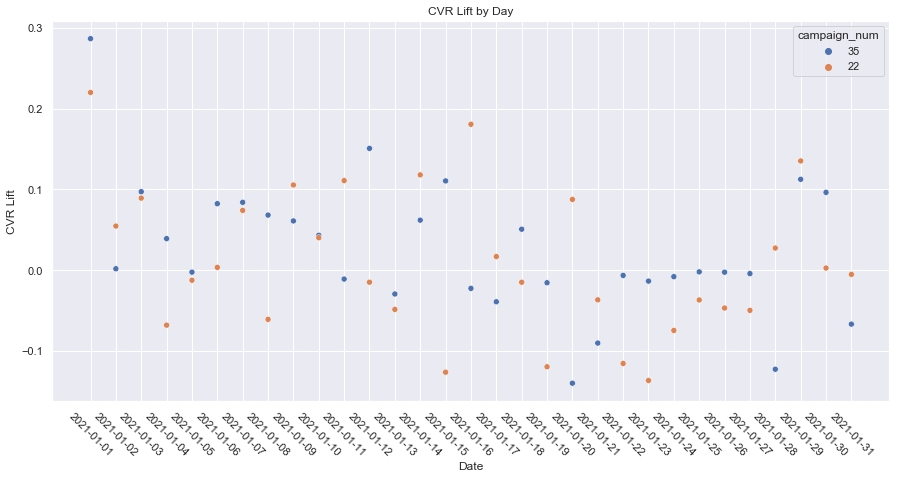

C:\Users\level\Anaconda3\lib\site-packages\tornado\gen.py:307: PerformanceWarning: indexing past lexsort depth may impact performance.
  yielded = next(result)


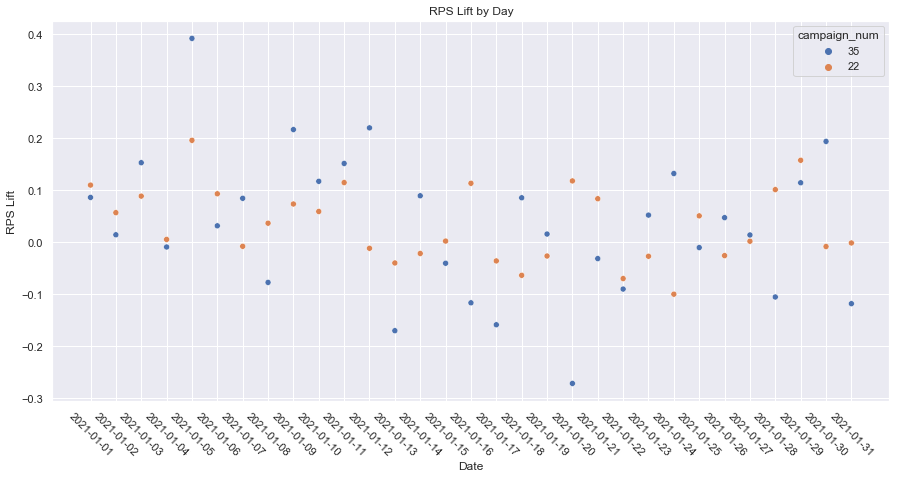

In [13]:
combined22_by_date = pd.pivot_table(combined22, index="date", aggfunc=np.sum, columns="group")
combined35_by_date = pd.pivot_table(combined35, index="date", aggfunc=np.sum, columns="group")

combined22_by_date_count = pd.pivot_table(combined22, index="date", aggfunc="count", columns="group")
combined35_by_date_count = pd.pivot_table(combined35, index="date", aggfunc="count", columns="group")

combined22_by_date = combined22_by_date.join(combined22_by_date_count, lsuffix="_sum" ,rsuffix="_count")
combined35_by_date = combined35_by_date.join(combined35_by_date_count, lsuffix="_sum" ,rsuffix="_count")


for date in combined22_by_date.iterrows():
          
    CVR_baseline22_date = date[1]["purchases_sum"]["baseline"] / date[1]["purchases_count"]["baseline"] 
    CVR_treatment22_date = date[1]["purchases_sum"]["treatment"] / date[1]["purchases_count"]["treatment"]
 
    combined22_by_date.at[date[0], "CVR_Lift"] = (CVR_treatment22_date / CVR_baseline22_date) - 1

    RPS_baseline22_date = date[1]["subtotal_sum"]["baseline"] / date[1]["subtotal_count"]["baseline"] 
    RPS_treatment22_date = date[1]["subtotal_sum"]["treatment"] / date[1]["subtotal_count"]["treatment"]
    
    combined22_by_date.at[date[0], "RPS_Lift"] = (RPS_treatment22_date / RPS_baseline22_date) - 1
       
for date in combined35_by_date.iterrows():
    
    CVR_baseline35_date = date[1]["purchases_sum"]["baseline"] / date[1]["purchases_count"]["baseline"] 
    CVR_treatment35_date = date[1]["purchases_sum"]["treatment"] / date[1]["purchases_count"]["treatment"]
   
    combined35_by_date.at[date[0], "CVR_Lift"] = (CVR_treatment35_date / CVR_baseline35_date) - 1

    RPS_baseline35_date = date[1]["subtotal_sum"]["baseline"] / date[1]["subtotal_count"]["baseline"] 
    RPS_treatment35_date = date[1]["subtotal_sum"]["treatment"] / date[1]["subtotal_count"]["treatment"]
    
    combined35_by_date.at[date[0], "RPS_Lift"] = (RPS_treatment35_date / RPS_baseline35_date) - 1

#Since I'll be combining these using pd.concat, I need to mark which rows are from which campaign to distinguish them    
combined22_by_date["campaign_num"] = "22"
combined35_by_date["campaign_num"] = "35"

CVR_RPS_by_date = pd.concat([combined35_by_date, combined22_by_date])

#The date column is the index on the dataframe, and for some reason Seaborn was throwing up an error on that column unless
#I reset the index
CVR_RPS_by_date = CVR_RPS_by_date.reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

ax_CVR = sns.scatterplot(x=CVR_RPS_by_date["date", ], y=CVR_RPS_by_date["CVR_Lift",], hue=CVR_RPS_by_date["campaign_num"])
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=-45)

ax_CVR.set(xlabel='Date', ylabel='CVR Lift', title='CVR Lift by Day')

plt.show()

ax_RPS = sns.scatterplot(x=CVR_RPS_by_date["date", ], y=CVR_RPS_by_date["RPS_Lift",], hue=CVR_RPS_by_date["campaign_num"])
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=-45)

ax_RPS.set(xlabel='Date', ylabel='RPS Lift', title='RPS Lift by Day')

plt.show()


Looking at these charts of daily RSP Lift and CVR Lift, one concerning result is that the CVR Lift for both campaigns was negative on many days, especially for campaign 22. There is of course some variability to be expected and the sample size is small, but this makes me somewhat less confident that the CVR lift for campaign 22 would be positive in the future, since it seems to not reliably increase CVR on a daily timeframe.

If we return to the aggregate CVR Lift and RPS Lift numbers for each campaign from earlier, campaign 22 performed better on RPS Lift while campaign 35 performed better on CVR Lift. 

Given all this, I am more confident in campaign 22 than campaign 35. The only campaign with a statistically significant increase in average order value was campaign 22. To me, this is the most important metric because it's looking directly at how much more money HomeCo will make from customers who are shown the recommendation versus those who would have but were selected not to. A good proportion of cusomters, about one in six, clicked through the recommendation for both campaigns as well, suggesting the recommendations do increase engagement, with campaign 22 increasing it by a bit more than campaign 35. 

By contrast, the values of the CVR Lift and RPS Lift for both campaigns are affected by how many customers in each group never put a kitchen item in their cart to begin with, which seems like it would not be correlated with the effectiveness of either recommendation from a financial or engagement perspective. So I put less stock, relatively speaking, on the differences in values between the campaigns on those two metrics, though I still think they are important.

That being said, I am intrigued by the fact that campaign 35 had a higher AOV Lift and a higher CVR Lift. I would be curious to look at the data for these two campaigns if they ran for another month or two. Perhaps, with more data, we'll find that campaign 35 maintains a higher AOV lift but it would be statistically significant, which would make it the more profitable campaign to run. Of course, there's also a good chance we'd find that it didn't produce any AOV Lift, or any statistically significant one, again over further months. 

So if I were to make a recommendation to HomeCo, I'd say that they should choose campaign 22. It's the one we can confidently say improves order value for those who actually put a kitchen item in their cart while also increasing engagement. It would be a low risk decision that would likely benefit HomeCo both financially and in terms of website engagement. Plus, since they seem worried about their online store's performance, I think they would want to implement some positive changes sooner rather than later.

If HomeCo expressed interest in further testing, I would recommend they continue testing obth campaigns for a month or two more to see if, with more data, we could confidnetly say that campaign 35 produces a higher AOV Lift. More data would also give us another chance to compare campaign 22 and 35 on RPS Lift and CVR Lift and see if the differences between those metrics for the two campaigns held, or changed. 

*Any more information about the test to share with the Granify team?*

For future tests like this, what would be helpful is if we could collect data that would identify when/if the same customer returned to the site again. With that kind of information, we could see if customers who saw a recommendation were more likely to return to the site and if they were more likely to make another purchase. This would be relevant to customers like HomeCo who want to see increased engagement from customers.